In [1]:
import xarray as xr

In [10]:
from dask.distributed import Client

In [11]:
client = Client()

In [12]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 4
Total threads: 12,Total memory: 46.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:34159,Workers: 4
Dashboard: /proxy/8787/status,Total threads: 12
Started: Just now,Total memory: 46.00 GiB
Comm: tcp://127.0.0.1:39543,Total threads: 3
Dashboard: /proxy/46381/status,Memory: 11.50 GiB
Nanny: tcp://127.0.0.1:34985,


In [3]:
cd /g/data/tm70/ek4684/MOM6-CICE6-WW3/WW3_PostProc/IC3_random_with_IS2BREAK

/g/data/tm70/ek4684/MOM6-CICE6-WW3/WW3_PostProc/IC3_random_with_IS2BREAK


In [4]:
ls

day_output/                           GMOM_JRA_WD.mom6.h.z_1999_01.nc
GMOM_JRA_WD.cice.h.1999-01.nc         GMOM_JRA_WD.mom6.h.z_1999_02.nc
GMOM_JRA_WD.cice.h.1999-02.nc         GMOM_JRA_WD.mom6.h.z_1999_03.nc
GMOM_JRA_WD.cice.h.1999-03.nc         GMOM_JRA_WD.mom6.h.z_1999_04.nc
GMOM_JRA_WD.cice.h.1999-04.nc         GMOM_JRA_WD.mom6.h.z_1999_05.nc
GMOM_JRA_WD.cice.h.1999-05.nc         GMOM_JRA_WD.mom6.h.z_1999_06.nc
GMOM_JRA_WD.cice.h.1999-06.nc         GMOM_JRA_WD.mom6.h.z_1999_07.nc
GMOM_JRA_WD.cice.h.1999-07.nc         GMOM_JRA_WD.mom6.h.z_1999_08.nc
GMOM_JRA_WD.cice.h.1999-08.nc         GMOM_JRA_WD.ww3.hi.1999-02-01-00000.nc
GMOM_JRA_WD.mom6.h.native_1999_01.nc  GMOM_JRA_WD.ww3.hi.1999-03-01-00000.nc
GMOM_JRA_WD.mom6.h.native_1999_02.nc  GMOM_JRA_WD.ww3.hi.1999-04-01-00000.nc
GMOM_JRA_WD.mom6.h.native_1999_03.nc  GMOM_JRA_WD.ww3.hi.1999-05-01-00000.nc
GMOM_JRA_WD.mom6.h.native_1999_04.nc  GMOM_JRA_WD.ww3.hi.1999-06-01-00000.nc
GMOM_JRA_WD.mom6.h.native_1999_05.nc  GMOM_JRA_WD.ww3.h

In [5]:
files = ! ls GMOM_JRA_WD.cice.*

In [6]:
files

['GMOM_JRA_WD.cice.h.1999-01.nc',
 'GMOM_JRA_WD.cice.h.1999-02.nc',
 'GMOM_JRA_WD.cice.h.1999-03.nc',
 'GMOM_JRA_WD.cice.h.1999-04.nc',
 'GMOM_JRA_WD.cice.h.1999-05.nc',
 'GMOM_JRA_WD.cice.h.1999-06.nc',
 'GMOM_JRA_WD.cice.h.1999-07.nc',
 'GMOM_JRA_WD.cice.h.1999-08.nc']

In [16]:
cice_ds = xr.open_mfdataset(files, compat="override",data_vars="minimal",coords="minimal")

In [23]:
client.close()

In [28]:
cice_ds

<xarray.Dataset>
Dimensions:      (time: 8, nbnd: 2, nj: 300, ni: 360, nc: 5, nkice: 4,
                  nksnow: 1, nkbio: 5, nkaer: 7, nf: 12, nvertices: 4)
Coordinates:
  * time         (time) object 2000-05-31 00:00:00 ... 2000-12-29 00:00:00
    TLON         (nj, ni) float32 80.5 81.5 82.5 83.5 ... 79.96 79.97 79.99
    TLAT         (nj, ni) float32 -77.88 -77.88 -77.88 ... 66.04 65.63 65.21
    ULON         (nj, ni) float32 -279.0 -278.0 -277.0 -276.0 ... 80.0 80.0 80.0
    ULAT         (nj, ni) float32 -77.75 -77.75 -77.75 ... 65.83 65.42 65.0
    NLON         (nj, ni) float32 80.5 81.5 82.5 83.5 ... 80.0 80.0 80.0 80.0
    NLAT         (nj, ni) float32 -77.75 -77.75 -77.75 ... 66.04 65.63 65.21
    ELON         (nj, ni) float32 81.0 82.0 83.0 84.0 ... 79.95 79.96 79.98 80.0
    ELAT         (nj, ni) float32 -77.88 -77.88 -77.88 ... 65.83 65.42 65.0
    NCAT         (nc) float32 dask.array<chunksize=(5,), meta=np.ndarray>
    NFSD         (nf) float32 dask.array<chunksize=(12,), meta=np.ndarray>
Dimensions without coordinates: nbnd, nj, ni, nc, nkice, nksnow, nkbio, nkaer,
                                nf, nvertices
Data variables: (12/110)
    time_bounds  (time, nbnd) object dask.array<chunksize=(1, 2), meta=np.ndarray>
    VGRDi        (nkice) float32 dask.array<chunksize=(4,), meta=np.ndarray>
    VGRDs        (nksnow) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    VGRDb        (nkbio) float32 dask.array<chunksize=(5,), meta=np.ndarray>
    VGRDa        (nkaer) float32 dask.array<chunksize=(7,), meta=np.ndarray>
    tmask        (nj, ni) float32 dask.array<chunksize=(300, 360), meta=np.ndarray>
    ...           ...
    apeff_ai     (time, nj, ni) float32 dask.array<chunksize=(1, 300, 360), meta=np.ndarray>
    wave_sig_ht  (time, nj, ni) float32 dask.array<chunksize=(1, 300, 360), meta=np.ndarray>
    aicen        (time, nc, nj, ni) float32 dask.array<chunksize=(1, 5, 300, 360), meta=np.ndarray>
    vicen        (time, nc, nj, ni) float32 dask.array<chunksize=(1, 5, 300, 360), meta=np.ndarray>
    vsnon        (time, nc, nj, ni) float32 dask.array<chunksize=(1, 5, 300, 360), meta=np.ndarray>
    afsdn        (time, nc, nf, nj, ni) float32 dask.array<chunksize=(1, 5, 12, 300, 360), meta=np.ndarray>
Attributes:
    title:             GMOM_JRA_WD
    contents:          Diagnostic and Prognostic Variables
    source:            Los Alamos Sea Ice Model, unknown_version_name
    comment:           All years have exactly 365 days
    comment2:          File written on model date 19990201
    comment3:          seconds elapsed into model date:      0
    time_period_freq:  month_1
    conventions:       CF-1.0
    history:           This dataset was created on 2024-01-22 at 23:50
    io_flavor:         io_pio netcdf

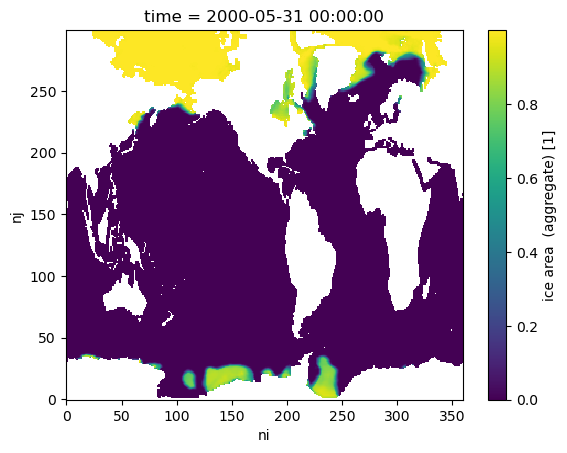

In [26]:
cice_ds.aice.isel(time=0).plot()

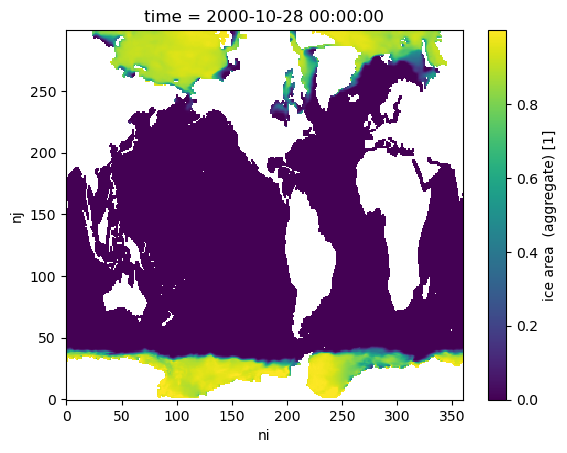

In [27]:
cice_ds.aice.isel(time=5).plot()

In [33]:
afsdn = cice_ds.afsdn.isel(time=5).sum(['nc'])

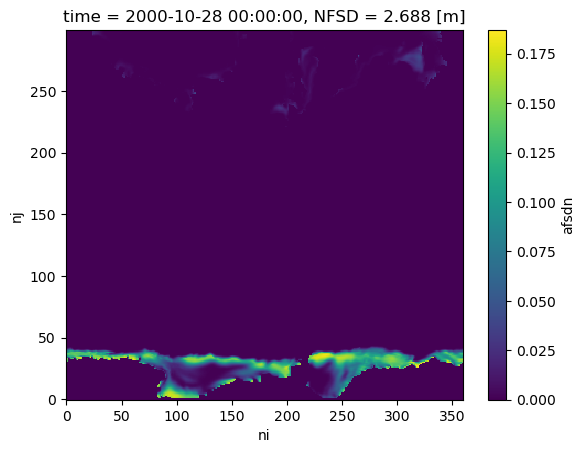

In [36]:
afsdn.isel(nf=0).plot()

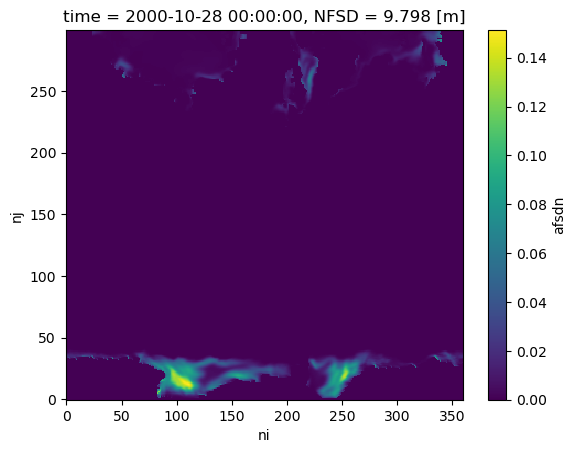

In [37]:
afsdn.isel(nf=1).plot()

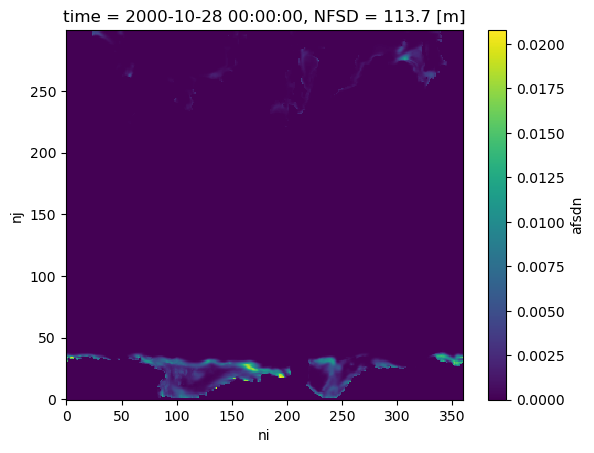

In [38]:
afsdn.isel(nf=5).plot()

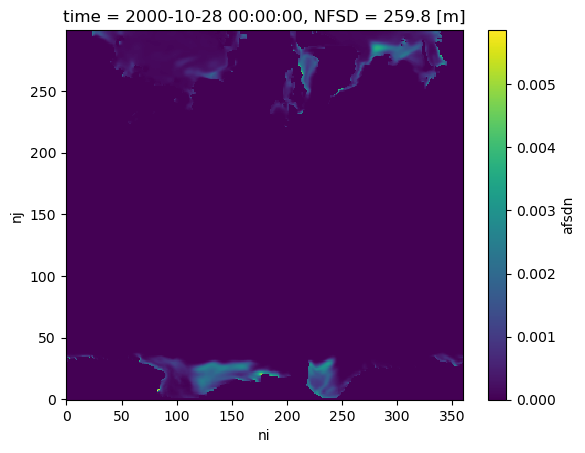

In [40]:
afsdn.isel(nf=7).plot()

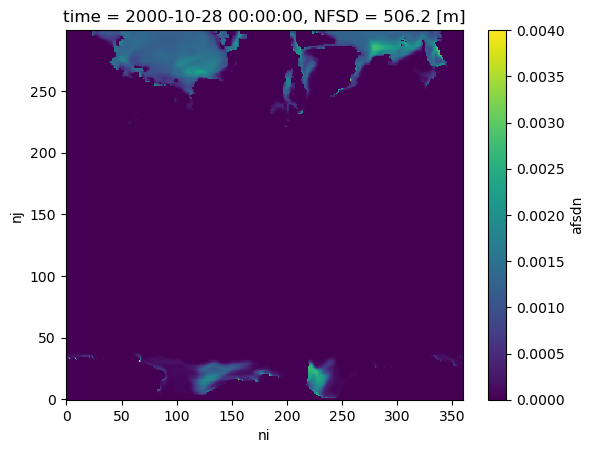

In [41]:
afsdn.isel(nf=9).plot()

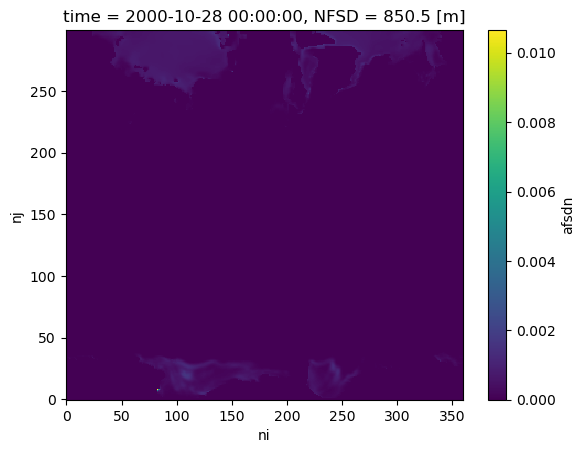

In [43]:
afsdn.isel(nf=11).plot()